<a href="https://colab.research.google.com/github/nvishnupriya99/Artificial-Intelligence-AI-/blob/Activation-Functions/Week_2_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activation Functions(**practice**)

In [ ]:
# (just run this, do not change)

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (6, 4)

print("Setup complete. You can move to the next cell.")

Setup complete. You can move to the next cell.


\## Step 2: Implementing two activation functions



In [ ]:
# Complete the missing activation functions

def step(x):
    return np.where(x > 0, 1, 0)

def linear(x):
    return x

# TODO: Implement sigmoid activation function
# Hint: use np.exp
def sigmoid(x):
    # replace the line below with correct code
    return 1/ (1+ np.exp(-x))


# TODO: Implement ReLU activation function
# Hint: use np.maximum
def relu(x):
    # replace the line below with correct code
    return np.maximum(0, x)


# Provided for you: tanh activation
def tanh_act(x):
    return np.tanh(x)

print("Activation functions loaded (you still need to complete sigmoid and relu).")

Activation functions loaded (you still need to complete sigmoid and relu).


## Step 3: Plot three activation functions of your choice



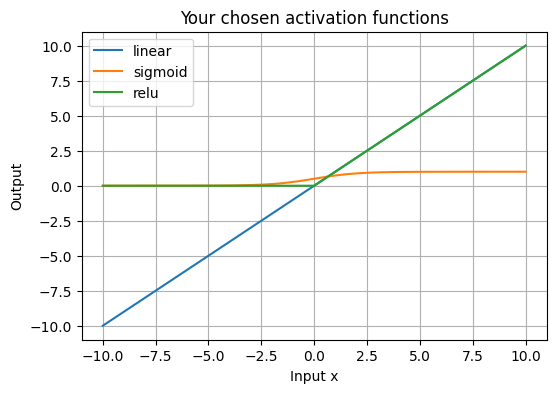

In [ ]:
# Choose and plot three activation functions

x_plot = np.linspace(-10, 10, 400)

# TODO: choose ANY 3 activation functions
# Example: functions_to_plot = [sigmoid, relu, tanh_act]
functions_to_plot = [ linear, sigmoid, relu ]

for func in functions_to_plot:
    y = func(x_plot)
    plt.plot(x_plot, y, label=func.__name__)

plt.title("Your chosen activation functions")
plt.xlabel("Input x")
plt.ylabel("Output")
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Complete the forward pass of a simple layer

We will now create a very small **neural network layer**.




In [ ]:
# Simple Layer class with a TODO forward pass

class Layer:
    def __init__(self, n_inputs, n_neurons):
        # random weights and zero bias
        self.weights = np.random.randn(n_inputs, n_neurons)
        self.bias = np.zeros((1, n_neurons))

    def forward(self, inputs, activation_func):
        # TODO: complete the forward pass
        # 1. Calculate Z = inputs dot weights + bias
        # 2. Apply activation function: A = activation_func(Z)
        # 3. Return Z and A

        Z = np.dot(inputs, self.weights) + self.bias
        A = activation_func(Z)

        return Z, A


# create some random input data (10 samples, 2 features)
X = np.random.randn(10, 2)
layer = Layer(2, 3)

print("Layer created. Now complete the forward() method above.")

Layer created. Now complete the forward() method above.


## Step 5: Compare two activation functions on the same layer

Now we will see how **two different activation functions** change the output of the **same layer**.




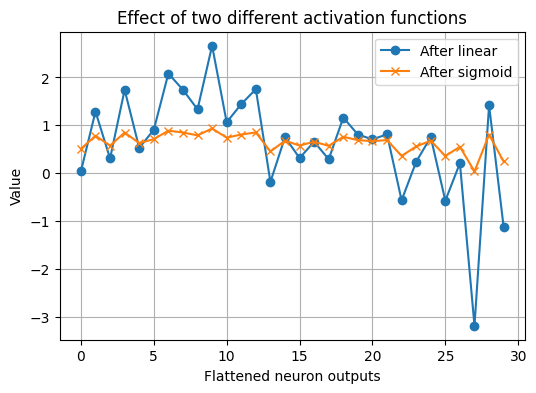

Sample raw output (Z1) before activation:
[[0.04106558 1.28774599 0.30873445]
 [1.74136904 0.53056385 0.90735933]
 [2.08141434 1.74222706 1.33421207]]


In [ ]:
# Compare two activations

# TODO: choose TWO activation functions
act1 = linear   # for example: sigmoid
act2 = sigmoid   # for example: relu

Z1, A1 = layer.forward(X, act1)
Z2, A2 = layer.forward(X, act2)

plt.plot(A1.flatten(), marker='o', label=f"After {act1.__name__}")
plt.plot(A2.flatten(), marker='x', label=f"After {act2.__name__}")
plt.title("Effect of two different activation functions")
plt.xlabel("Flattened neuron outputs")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

print("Sample raw output (Z1) before activation:")
print(Z1[:3])

## Step 6: See what happens when we scale the weights

We will now **scale the weights** of the same layer and see how the ReLU activation behaves.



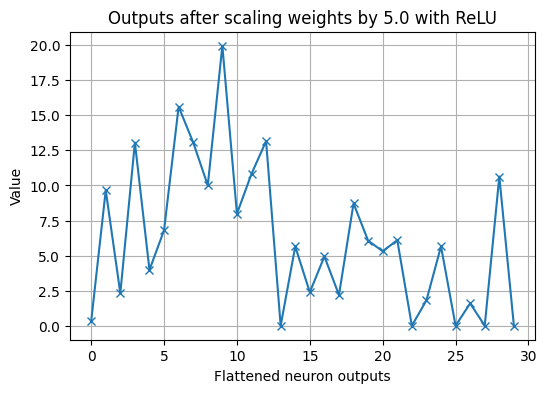

Scaled activated outputs (first 3 rows):
[[ 0.30799182  9.6580949   2.3155084 ]
 [13.06026778  3.97922888  6.80519497]
 [15.61060752 13.06670295 10.00659056]]


In [ ]:
# Scale the weights and observe effect with ReLU

scale_factor = 5.0   # you can try 0.5, 2.0, 5.0, etc.

layer.weights *= scale_factor

Z_scaled, A_scaled = layer.forward(X, relu)

plt.plot(A_scaled.flatten(), marker='x')
plt.title(f"Outputs after scaling weights by {scale_factor} with ReLU")
plt.xlabel("Flattened neuron outputs")
plt.ylabel("Value")
plt.grid(True)
plt.show()

print("Scaled activated outputs (first 3 rows):")
print(A_scaled[:3])

#Short reflection (answer in  own words)




1. Which activation function do you think is best for deep neural networks and why?


In modern deep neural networks, ReLU (Rectified Linear Unit) is generally the most effective default choice.
Key reasons:

- It avoids the vanishing gradient problem much better than sigmoid or tanh because its gradient is 1 for all positive values.

- It is computationally efficient and simple.

- It allows networks to learn sparse representations, which supports faster and more stable training.

- It scales well to very deep architectures, which is why it is used in almost all contemporary deep learning models.

- Sigmoid and tanh are still used in specific scenarios, such as output layers or recurrent units, but ReLU remains the standard for hidden layers.

2. In Step 5, how were the outputs of your two chosen activations different?  


I chose:

- act1 = linear

- act2 = sigmoid

The differences I observed:

- Linear activation produces outputs that match the raw pre-activation values (Z). They are unbounded and can be positive or negative.

- Sigmoid activation compresses all values into the range 0 to 1, making the outputs smoother and less sensitive to extreme input values.

As a result, the plotted curves should show:

Linear outputs fluctuating widely.

Sigmoid outputs appearing “flattened” or “squeezed" toward the middle range with saturation near 0 and 1.

3. In Step 6, what happened to the outputs when the weights were scaled up?

     Because I scaled the weights by a factor of 5.0 and used ReLU:

- The pre-activation values (Z) became larger in magnitude (especially on the positive side).

- Since ReLU outputs max(0, Z), the activated outputs also increased significantly whenever Z was positive.

- More neurons likely produced large positive activations, and fewer produced zero outputs.

In short: scaling the weights up amplified the ReLU outputs, creating higher-magnitude activation values.

4. What is one thing about activation functions that became clearer for you after this activity?


A strong answer would be:

This activity clarified how activation functions directly shape the behavior of a layer, particularly:

- How some functions (sigmoid/tanh) compress and saturate values, affecting gradients.

- How others (ReLU/linear) allow values to grow without bound, which makes the network more sensitive to weight scaling.

- That choosing the activation function can change both the magnitude and distribution of neuron outputs, which ultimately affects learning dynamics.